# 18-3-DRILL-Assumption of linear regression model

## Assumption of linear regression model: Predicting temperature

- In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. 

*** can you predict temperature based on humidity? windspeed, windbearing, and pressure?

- First, load the dataset from the weatherinszeged table from Thinkful's database.
- Build a regression model where the target variable is temperature. 
- As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

- Now, check if your model meets the Gauss-Markov Conditions. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

- Gauss-Markov Conditions
    * linearity of models in their coefficients
    * the error term should be zero on average
    * homoscedasticity
    * low multicollinearity
    * error terms should be uncorrelated with one another and with features
    * normality of the errors



*** As in earlier assignments, be sure to close the database connection after initially pulling in your data.


--- updates
conda update pandas
pip3 install --upgrade pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
#postgres_user = 'dsbc_student'
#postgres_pw = '7*.8G9QH21'
#postgres_host = '142.93.121.174'
#postgres_port = '5432'
#postgres_db = 'weatherinszeged'

### Load the data 

In [4]:
#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    #postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
#engine.dispose()

weather = pd.read_csv('weatherHistory.csv')

weather.head(10)

#weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
weather.rename(columns={'Humidity': 'humidity', 'Wind Speed (km/h)': 'windspeed', 'Wind Bearing (degrees)': 'windbearing', 'Pressure (millibars)': 'pressure', 'Temperature (C)': 'temperature'}, inplace=True)

In [7]:
## Plot the scatter matrix for all variables in the dataset. 
##Do all variables have a pairwise linear relationship?

#pd.plotting.scatter_matrix(weather, figsize=(12, 12))
#plt.tight_layout()
#plt.show()

In [8]:
# Next check the data to make sure there is no missing data. 
# Remove rows containing missing data if it exists. 

weather.isnull().sum()*100/weather.isnull().count()

Formatted Date             0.000
Summary                    0.000
Precip Type                0.536
temperature                0.000
Apparent Temperature (C)   0.000
humidity                   0.000
windspeed                  0.000
windbearing                0.000
Visibility (km)            0.000
Loud Cover                 0.000
pressure                   0.000
Daily Summary              0.000
dtype: float64

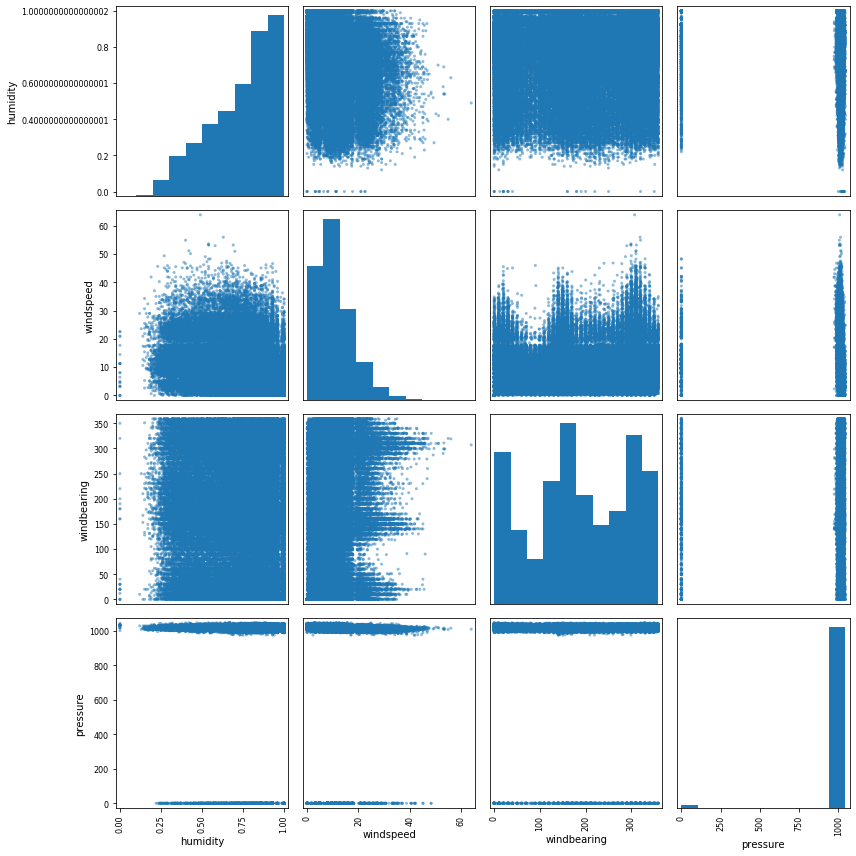

In [9]:
# extracting just the variables needed

X = weather[['humidity','windspeed','windbearing', 'pressure']] 

pd.plotting.scatter_matrix(X, figsize=(12, 12))
plt.tight_layout()
plt.show()


** None of these looks linear at all ???? 

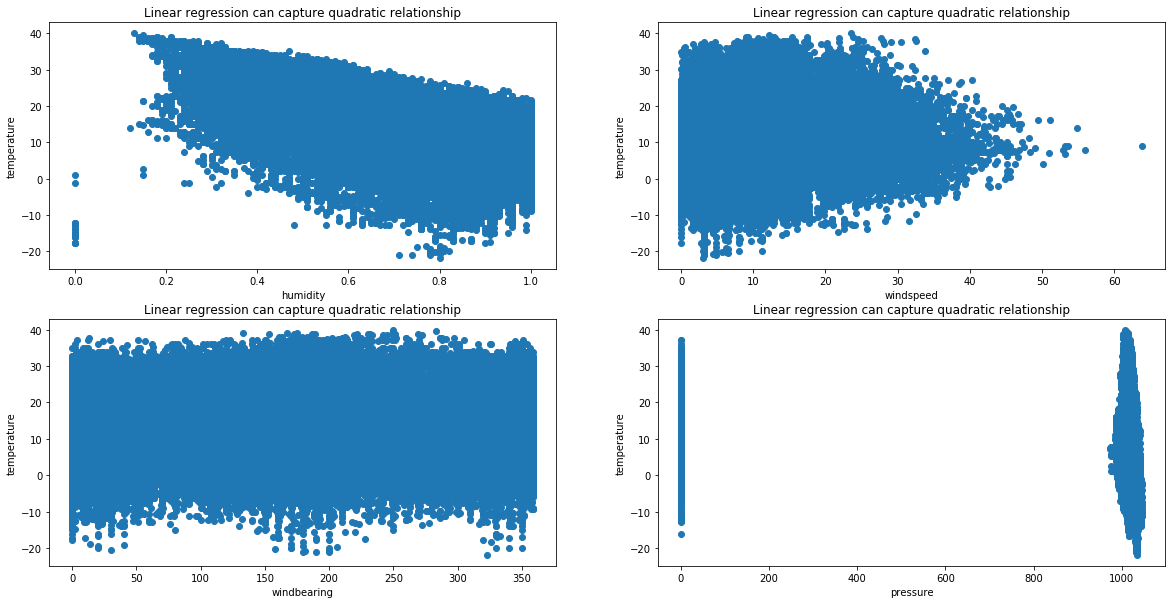

In [10]:
### humidity, windspeed, windbearing, and pressure are the explainatory variables. 
# since they are all float lets see how the plots look like relative to temperature

#features = weather[['humidity','windspeed','windbearing', "pressure"]]
plt.figure (figsize=(20,10))

plt.subplot(2,2,1)
plt.scatter(X['humidity'], weather["temperature"])
plt.xlabel("humidity")
plt.ylabel("temperature")
plt.title('Linear regression can capture quadratic relationship')


plt.subplot(2,2,2)
plt.scatter(X['windspeed'], weather["temperature"])
plt.xlabel("windspeed")
plt.ylabel("temperature")
plt.title('Linear regression can capture quadratic relationship')

plt.subplot(2,2,3)
plt.scatter(X['windbearing'], weather["temperature"])
plt.xlabel("windbearing")
plt.ylabel("temperature")
plt.title('Linear regression can capture quadratic relationship')

plt.subplot(2,2,4)
plt.scatter(X['pressure'], weather["temperature"])
plt.xlabel("pressure")
plt.ylabel("temperature")
plt.title('Linear regression can capture quadratic relationship')

plt.show()

These don't look like linear relationship to me at all 

### Now, let's build our  model using these 4 features: Humidity, windspeed, windbearing, pressure
- we build a simple linear regression model and estimate it using OLS

*** from sklearn import linear_model
*** lrm = linear_model.LinearRegression()

- pip install statsmodels if you need it

In [11]:
# Y is the target variable
Y = weather['temperature'].values

# X is the feature set which includes
X = weather[['humidity','windspeed','windbearing','pressure']]


In [20]:
#### We could use LinearRegression() model from the linear_model module - 
# then we will use the easy way which would be OLS


# We create a LinearRegression model object
# from scikit-learn's linear_model module.

lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
### LinearRegression()'s fit() method runs the OLS algorithm by default
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.926438185285384


In [12]:
### Double check that the model is correct
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:24:07   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The pValues for all the coefficients are < 0.05 which rejects the null that these are not significant. this shows that these 4 features are significant in determining the temperature.

#### Analysis of the statsmodel function
* NOTE: we added a constant to our existing feature set using this code:X = sm.add_constant(X). This is because statsmodels' fit() function doesn't add a constant by default as opposed to scikit-learn's fit() function.

* when we call the summary() function on the fitted OLS model, it prints out a table statistics.

* in the upper side of the table, we see statistics like R-squared, adjusted R-squared, F-statistic, Log-likelihood, AIC, and BIC. Those are related to the goodness of fit of our model. 

* In the lower part, we see statistics like Durbin-Watson, Jarque-Bera, skewness, and kurtosis. Those statistics are related to whether our model satisfies some assumptions of the linear regression model. 

* For example, skewness is a measure of how asymmetric our data is and kurtosis is a measure of whether our data is heavy or light tailed with respect to a normal distribution. 

* notice that in the middle of the table, estimated values for the coefficients are given, and those are exactly the same as what we got from the scikit-learn.

In [13]:
### We would like to split the data into train and test samples. 
# Use tpc as the y column and split the data with 25% of the data in the test sample.

#split dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


### using stratify=Y is not working here becasue there is not enough llabel in the data?
#This because of the nature of stratification. The stratify parameter set it to split data 
# in a way to allocate test_size amount of data to each class. In this case, 
# you don't have sufficient class labels of one of your classes to keep the data splitting 
# ratio equal to test_size.

### You can either take a random sample (not stratified) or try different test_size values, 
#to be able to have an adequate size that could hold all your various labels.

In [14]:
## Using statsmodels, train the model and print out a summary

### Double check that the model is correct
import statsmodels.api as sm

# We add a constant to the model, the “baseline” of the data in case all of your 
# features values are 0.
X_train = sm.add_constant(X_train)


In [15]:
# Let's train the model!
results = sm.OLS(y_train, X_train).fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.326e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:24:16   Log-Likelihood:            -2.4596e+05
No. Observations:               72339   AIC:                         4.919e+05
Df Residuals:                   72334   BIC:                         4.920e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          38.0116      0.266    142.984      0.000      37.491      38.533
humidity      -32.5525      0.141   -230.073      0.000     -32.830     -32.275
windspeed      -0.2005      0.004    -49.846      0.000      -0.208      -0.193
windbearing     0.0040      0.000     15.976      0.000       0.004       0.005
pressure       -0.0007      0.000     -3.244      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     2478.556   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2778.417
Skew:                          -0.450   Prob(JB):                         0.00
Kurtosis:                       3.333   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumptions of linear regression
- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.


In [ ]:
 ### 1 - linearity of models in their coefficients

### This is just a random example to show that the model fits in a linear line

df = pd.DataFrame()

# data from 0 to 999
df["X"] = np.arange(0,1000,1)
# we take the square of X
df["X_sq"] = df["X"]**2

# this is our equation: Y = 1 + 2*X + 3*X^2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X","X_sq"]],df["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df[["X","X_sq"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

## MAGDA QUESTION: I really don't know what to do with assumption #1?

In [16]:
### 2 - the error term should be zero on average

# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test) ## results is the model

errors = y_test - y_preds # Y is the target variable "charges"

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -0.016970251606453216


*** Since, we include the constant term in the model, the average of the model's error is effectively zero. ### What does this mean?

### Assumption 3: homoscedasticity


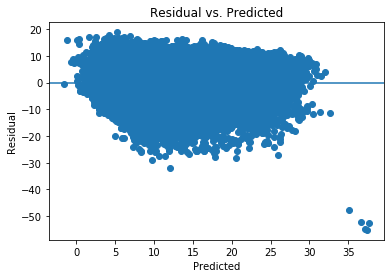

In [17]:
### Assumption 3: homoscedasticity
# - A model is homoscedastic when the error variance shouldn't systematically change 
# across observations. When this assumption is not met, we are dealing with heteroscedasticity.

plt.scatter(y_preds, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [18]:
### Assumption 3: homoscedasticity
# Test for homoscedasticity

#  Bartlett and Levene tests. 
# The null hypothesis for both tests is that the errors are homoscedastic. 

# p-value < 0.05 === > reject null === the errors are NOT homoscedastic
# p-value > 0.05 === > the errors are homoscedastic.


from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_preds, errors)
lev_stats = levene(y_preds, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 680.176 and p value is 6.12e-150
Levene test statistic value is 634.048 and p value is 5.23e-139


* The p-values of both tests are lower than 0.05. 
* So, the test results reject the null hypothesis (null hypothesis would be that errors are homoscedastic) which means our errors are heteroscedastic.


In [ ]:
### Assumption four: low multicollinearity


## MAGDA QUESTION: How do I test for multicollinearity?

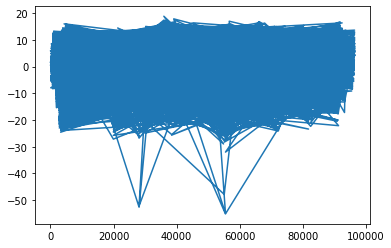

In [19]:
### Assumption five: error terms should be uncorrelated with one another
# the error term for one observation shouldn't predict the error term for another. 
# This type of serial correlation may happen if we omit a relevant variable from the model. 
# So, including that variable into the model can solve for this issue.

# To identify whether the error terms are correlated with each other or not, we can graph them

plt.plot(errors)
plt.show()

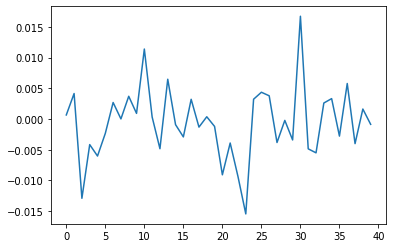

In [20]:
### Another way to look at correlations between errors is use the autocorrelation function - acf()
# In our case, the order of the errors are the orders of the observations.

from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

* the autocorrelation between the errors of our weather model is indeed very low (ranging between -0.015 and 0.015).

In [ ]:
### Assumption six: features shouldn't be correlated with the errors

# the most important assumption: explanatory variables and errors should be independent. 
# If this assumption doesn't hold, then the model's predictions will be unreliable as the 
# estimates of the coefficients would be biased. This assumption is known as the exogeneity.

#### Another important thing to consider is the normality of the error terms. normality of errors is not required to apply OLS to a linear regression model, but in order to measure the statistical significance of our estimated coefficients, error terms must be normally distributed.  There are various ways to check for normality of error terms. 
* An informal way of doing this is by visualizing the errors in a QQ plot or to look at the histogram. 
*** A better way is to use Jarque Bera and normal tests

In [21]:
### null hypothesis is that errors are normally distributed
# p-value < 0.05 === > reject null === the errors are NOT normally distributed
# p-value > 0.05 === > the errors are normally distributed.

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1016.8999409485988 and p value is 0.0
Normality test statistics is 898.0089880798612 and p value is 9.995991742604023e-196


pvalue < 0.05 === rejects null and tells us that the errors are not normally distributed

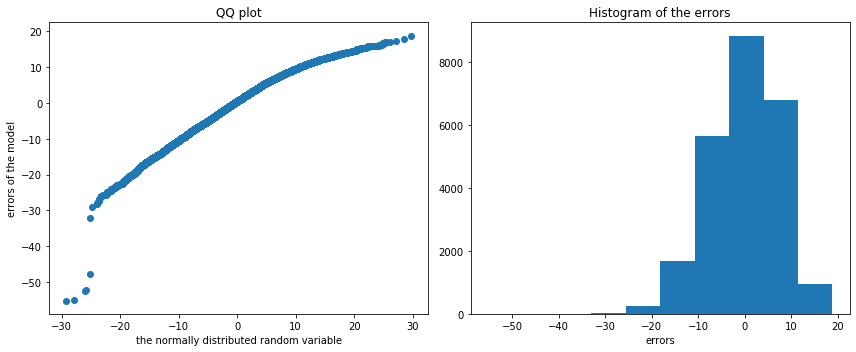

In [22]:
### code to check normality using qq plot or histogram

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

# Steps to linear regression model
- ### Designing a model: 𝑦=𝛼+𝛽𝑥+𝜃𝑧
- ### Estimating the coefficients: optimization algorithm called Ordinary Least Squares (OLS for short)
- ### Assumptions of linear regression
    1. linearity of models in their coefficients 
        ### don't know how to check
    2. the error term should be zero on average 
        - meets the assumption
    3. homoscedasticity - does not meet 
        - it is heteroscedastic
    4. low multicollinearity 
        ### not sure how to check
    5. error terms should be uncorrelated with one another and with features 
        ### how to check this?
    6. normality of the errors 
        - does not meet - the errors are not normal
